In [1]:
import pandas as pd
import numpy as np
import pdb
import seaborn as sns

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 1000)

In [2]:
boston_listings = pd.read_csv('boston_airbnb/listings.csv')
boston_calendars = pd.read_csv('boston_airbnb/calendar.csv')
boston_reviews = pd.read_csv('boston_airbnb/reviews.csv')

seattle_listings = pd.read_csv('seattle_airbnb/listings.csv')
seattle_calendars = pd.read_csv('seattle_airbnb/calendar.csv')
seattle_reviews = pd.read_csv('seattle_airbnb/reviews.csv')

Source of Data:
https://www.kaggle.com/airbnb/seattle/data
https://www.kaggle.com/airbnb/boston

In [3]:
seattle_listings.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,2212,2884,3498,3498,3818,3498,3.818000e+03,3818,3816,3816,3810,2959,3295,3295,3045,3816,3816,3816,3518,3816.000000,3816.000000,3818,3816,3816,3818,3402,3818,3818,3818,3818,3811,3818,3818,3818,3818,3818.000000,3818.000000,3818,3817,3818,3818.000000,3802.000000,3812.000000,3817.000000,3818,3818,97.000000,3818,2009,1517,1866,2788,3818.000000,3818,3818.000000,3818.000000,3818,3818,3818.000000,3818.000000,3818.000000,3818.000000,3818,3818.000000,3191,3191,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,1999,2574,3498,3498,3818,3498,NaN,2751,1466,1380,120,2011,4,45,2,2,2743,2743,102,NaN,NaN,116,2,2,1442,81,87,17,7,2,28,1,7,1,1,NaN,NaN,2,16,3,NaN,NaN,NaN,NaN,5,3284,NaN,273,395,356,46,118,NaN,45,NaN,NaN,34,1,NaN,NaN,NaN,NaN,1,NaN,984,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/938785,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,https://a0.muscache.com/ac/pictures/8846311/c2...,https://a1.muscache.com/im/pictures/58339578/d...,https://a2.muscache.com/ac/pictures/19304666/7...,https://a1.muscache.com/ac/pictures/54334704/a...,NaN,https://www.airbnb.com/users/show/8534462,Andrew,2013-08-30,"Seattle, Washington, United States",It would be my pleasure to share and explore t...,within an hour,100%,100%,f,https://a2.muscache.com/ac/pictures/a4d7d053-c...,https://a2.muscache.com/ac/pictures/a4d7d053-c...,Capitol Hill,NaN,NaN,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"1st Avenue, Seattle, WA 98101, United States",Capitol Hill,Broadway,Other neighborhoods,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,NaN,NaN,t,House,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,{},NaN,$150.00,$500.00,"$2,500.00",$100.00,$50.00,NaN,$0.00,NaN,NaN,today,t,NaN,NaN,NaN,NaN,2016-01-04,NaN,2015-09-21,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,39,32,1,1,1,1,NaN,46,56,51,3259,46,1692,2371,3044,3038,46,46,405,NaN,NaN,595,3809,2997,30,351,397,794,3810,3817,420,3818,3810,3818,3818,NaN,NaN,3412,1733,2541,NaN,NaN,NaN,NaN,3657,45,NaN,162,94,66,348,310,NaN,2048,NaN,NaN,706,

### First Question

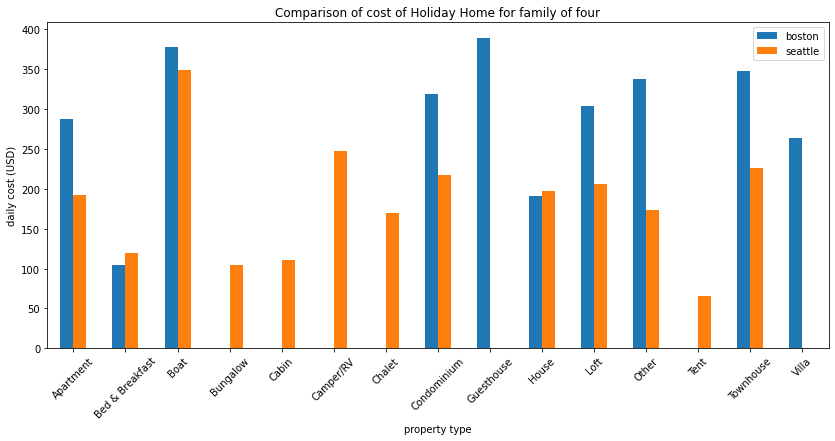

In [24]:
# question 1 which city is more expensive given family of 4
# Step 1: Gather
seattle_listing = seattle_listings[['id', 'accommodates', 'property_type', 'price', 'security_deposit', 'cleaning_fee']].copy(deep=True)
boston_listing = boston_listings[['id', 'accommodates', 'property_type', 'price', 'security_deposit', 'cleaning_fee']].copy(deep=True)
boston_listing = boston_listing[boston_listing['accommodates'] == 4].copy(deep=True)
seattle_listing = seattle_listing[seattle_listing['accommodates'] == 4].copy(deep=True)

# step 2 and 3: assess and clean
seattle_listing['cleaning_fee'].fillna(0, inplace=True)
seattle_listing['security_deposit'].fillna(0, inplace=True)
seattle_listing.dropna(axis=0, how='any', inplace=True)
boston_listing['cleaning_fee'].fillna(0, inplace=True)
boston_listing['security_deposit'].fillna(0, inplace=True)
boston_listing.dropna(axis=0, how='any', inplace=True)

def cleanup_symbol(df, col_names = ['price', 'cleaning_fee']):
    """
    function that clean up the '$' sign and convert string to float
    
    arguments:
        df: pandas dataframe containing the data to be cleaned.
        col_names: column names to apply the clean up of '$' and convert string to float.
    """
    for col in col_names:
        df[col] = [float(str(i).replace('$','').split('.')[0].replace(',','')) for i in df[col]]
    return df

seattle_listing_cleaned = cleanup_symbol(seattle_listing)
boston_listing_cleaned = cleanup_symbol(boston_listing)

# step 4 and 5: analyze and model
boston_listing_cleaned['daily_cost'] = boston_listing_cleaned[['price', 'cleaning_fee']].sum(axis=1)
seattle_listing_cleaned['daily_cost'] = seattle_listing_cleaned[['price', 'cleaning_fee']].sum(axis=1)
boston_family = boston_listing_cleaned.groupby(["property_type"]).mean()['daily_cost']
seattle_family = seattle_listing_cleaned.groupby(["property_type"]).mean()['daily_cost']
comparison = pd.merge(boston_family, seattle_family, left_index=True, right_index=True, how='outer')
comparison.columns = ['boston', 'seattle']

#step 6: visualize:
_ = comparison.plot.bar(title='Comparison of cost of Holiday Home for family of four', figsize=(14,6), xlabel='property type', ylabel='daily cost (USD)', rot=45)

#### Inference drawn:

- For a family of four, hotel homes in Boston are consistently priced higher than in Seattle for the category of properties that are present in 2 cities. 
- It can also be seen that the hotel homes in Seattle seem to provide a myriad of experiences like Camper/RV and tent stay.


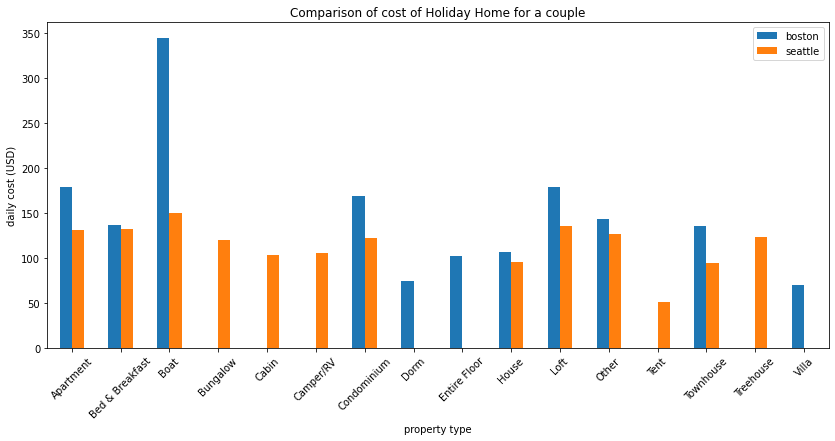

In [25]:
# question 1 which city is more expensive given a couple 
# Step 1: Gather
seattle_listing = seattle_listings[['id', 'accommodates', 'property_type', 'price', 'security_deposit', 'cleaning_fee']].copy(deep=True)
boston_listing = boston_listings[['id', 'accommodates', 'property_type', 'price', 'security_deposit', 'cleaning_fee']].copy(deep=True)
boston_listing = boston_listing[boston_listing['accommodates'] == 2].copy(deep=True)
seattle_listing = seattle_listing[seattle_listing['accommodates'] == 2].copy(deep=True)

# step 2 and 3: assess and clean
seattle_listing['cleaning_fee'].fillna(0, inplace=True)
seattle_listing['security_deposit'].fillna(0, inplace=True)
seattle_listing.dropna(axis=0, how='any', inplace=True)
boston_listing['cleaning_fee'].fillna(0, inplace=True)
boston_listing['security_deposit'].fillna(0, inplace=True)
boston_listing.dropna(axis=0, how='any', inplace=True)

def cleanup_symbol(df, col_names = ['price', 'cleaning_fee']):
    """
    function that clean up the '$' sign and convert string to float
    
    arguments:
        df: pandas dataframe containing the data to be cleaned.
        col_names: column names to apply the clean up of '$' and convert string to float.
    """
    for col in col_names:
        df[col] = [float(str(i).replace('$','').split('.')[0].replace(',','')) for i in df[col]]
    return df

seattle_listing_cleaned = cleanup_symbol(seattle_listing)
boston_listing_cleaned = cleanup_symbol(boston_listing)

# step 4 and 5: analyze and model
boston_listing_cleaned['daily_cost'] = boston_listing_cleaned[['price', 'cleaning_fee']].sum(axis=1)
seattle_listing_cleaned['daily_cost'] = seattle_listing_cleaned[['price', 'cleaning_fee']].sum(axis=1)
boston_family = boston_listing_cleaned.groupby(["property_type"]).mean()['daily_cost']
seattle_family = seattle_listing_cleaned.groupby(["property_type"]).mean()['daily_cost']
comparison = pd.merge(boston_family, seattle_family, left_index=True, right_index=True, how='outer')
comparison.columns = ['boston', 'seattle']

#step 6: visualize:
_ = comparison.plot.bar(title='Comparison of cost of Holiday Home for a couple', figsize=(14,6), xlabel='property type', ylabel='daily cost (USD)', rot=45)

#### Inference drawn:

- For a couple, hotel homes in Boston are higher in daily cost  
- It can also be seen that the hotel homes in Seattle seem to provide a myriad of experiences like Camper/RV and tent stay.


### Second Question

In [18]:
# Step 1: Gather
cleaning_boston_df = boston_listings[['id', 'property_type', 'cleaning_fee', 'review_scores_cleanliness']]
cleaning_seattle_df = seattle_listings[['id', 'property_type', 'cleaning_fee', 'review_scores_cleanliness']]

In [19]:
# step 2 and 3: assess and clean
cleaning_boston_df = cleaning_boston_df[cleaning_boston_df['review_scores_cleanliness'].notnull()].copy(deep=True)
cleaning_seattle_df = cleaning_seattle_df[cleaning_seattle_df['review_scores_cleanliness'].notnull()].copy(deep=True)
cleaning_boston_df.fillna(0, inplace=True)
cleaning_seattle_df.fillna(0, inplace=True)
def cleanup_symbol(df, col_names = ['cleaning_fee']):
    for col in col_names:
        df[col] = [float(str(i).replace('$','').split('.')[0].replace(',','')) for i in df[col]]
    return df
cleaning_boston_df=cleanup_symbol(cleaning_boston_df)
cleaning_seattle_df=cleanup_symbol(cleaning_seattle_df)
merged_cleaning = pd.concat([cleaning_boston_df, cleaning_seattle_df])

In [20]:
# step 4 and 5: analyze and model
import statsmodels.api as sm

x, y = merged_cleaning['cleaning_fee'], merged_cleaning['review_scores_cleanliness']
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     review_scores_cleanliness   R-squared:                       0.007
Model:                                   OLS   Adj. R-squared:                  0.007
Method:                        Least Squares   F-statistic:                     39.98
Date:                       Sun, 18 Jul 2021   Prob (F-statistic):           2.75e-10
Time:                               12:17:23   Log-Likelihood:                -8392.4
No. Observations:                       5932   AIC:                         1.679e+04
Df Residuals:                           5930   BIC:                         1.680e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.3422      0.018    532.133      0.000       9.308       9.377
cleaning_fee     0.0016      0.000      6.323      0.000       0.001       0.002
==============================================================================
Omnibus:                     3669.175   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42573.141
Skew:                          -2.822   Prob(JB):                         0.00
Kurtosis:                      14.848   Cond. No.                         93.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

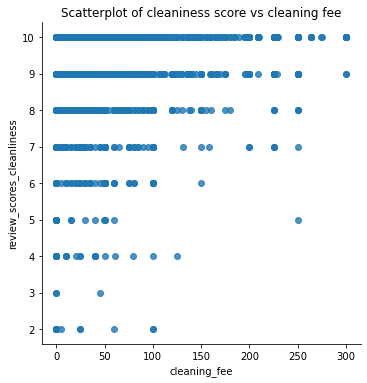

In [22]:
# step 6:
import matplotlib.pyplot as plt
sns.lmplot(data=merged_cleaning, x='cleaning_fee', y='review_scores_cleanliness', fit_reg = False ,height = 5)
_ = plt.title('Scatterplot of cleaniness score vs cleaning fee')

#### Inference drawn:

- Based on the F-statistics probability, the linear regression using cleaning fee as the independent variable is useful in predicting the dependent variable. 
- The p-value for the independent variable is lesser than the 0.05 level of significance, meaning that the cleaning fee is significant in predicting the cleanliness score. 
- For every dollar increase in a cleaning fee, the cleanliness score increase by 0.0016. 
- Conclusion: the cleaning fee does mean that the hotel homes are cleaner than hotels that do not collect cleaning fees on average.


### Third Question

In [27]:
# Step 1: Gather
Boston_popular = boston_listings[['neighbourhood_cleansed', 'review_scores_rating']].copy(deep=True)
Seattle_popular = seattle_listings[['neighbourhood_cleansed', 'review_scores_rating']].copy(deep=True)

In [30]:
# Step 2: assess the data
Boston_popular.describe(include='all')

,neighbourhood_cleansed,review_scores_rating
count,3585,2772.000000
unique,25,NaN
top,Jamaica Plain,NaN
freq,343,NaN
mean,NaN,91.916667
std,NaN,9.531686
min,NaN,20.000000
25%,NaN,89.000000
50%,NaN,94.000000
75%,NaN,98.250000


In [31]:
# Step 2: assess the data
Boston_popular.describe(include='all')

,neighbourhood_cleansed,review_scores_rating
count,3585,2772.000000
unique,25,NaN
top,Jamaica Plain,NaN
freq,343,NaN
mean,NaN,91.916667
std,NaN,9.531686
min,NaN,20.000000
25%,NaN,89.000000
50%,NaN,94.000000
75%,NaN,98.250000


In [34]:
# Step 3: Clean
Boston_popular.dropna(how='any', inplace=True)
Seattle_popular.dropna(how='any', inplace=True)

# Step 4 and 5: Analyze and Model
boston_best = Boston_popular.groupby('neighbourhood_cleansed').mean().sort_values(by='review_scores_rating', ascending=False).head()
seattle_best = Seattle_popular.groupby('neighbourhood_cleansed').mean().sort_values(by='review_scores_rating', ascending=False).head()

boston_best['ranking'] = list(range(1,6))
boston_best['city'] = 'Boston'
seattle_best['ranking'] = list(range(1,6))
seattle_best['city'] = 'Seattle'

df_best = pd.concat([boston_best, seattle_best])
df_best.sort_values(by='ranking')

,review_scores_rating,ranking,city
neighbourhood_cleansed,,,
Leather District,98.333333,1,Boston
Arbor Heights,98.000000,1,Seattle
Roslindale,95.380000,2,Boston
Riverview,97.250000,2,Seattle
West Roxbury,95.212121,3,Boston
Southeast Magnolia,97.214286,3,Seattle
South Boston Waterfront,94.431034,4,Boston
Madrona,97.100000,4,Seattle
Jamaica Plain,94.159322,5,Boston


#### Here are the top 5 neighborhood from each city

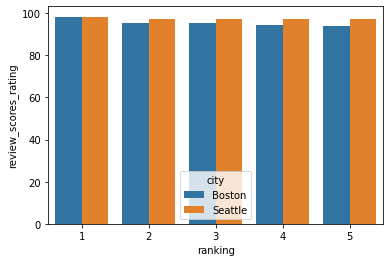

In [35]:
# Step 6: Visualize:
ax = sns.barplot(x="ranking", y="review_scores_rating", hue="city", data=df_best)

# nothing much to visualize so this plot is excluded.